In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This guide provides a quick overview of `TensorFlow basics`.

`TensorFlow` is an end-to-end platform for Machine Learning. It supports the following:
* Multidimensional-array based numeric computation (similar to `NumPy`)
* GPU and distributed processing
* Automatic differentiation
* Model construction, training, and export
* And more

In [2]:
%cd '/content/drive/MyDrive/05. My Colab Notebooks/LIBRARY - TensorFlow'

/content/drive/MyDrive/05. My Colab Notebooks/LIBRARY - TensorFlow


In [3]:
%ls -l

total 4
drwx------ 4 root root 4096 Sep 11 01:41 saved/


# **Tensors**

`TensorFlow` operates on multidimensional arrays or tensors represented as `tf.Tensor` objects. Here is a two-dimensional tensor

In [4]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print("Shape: ", x.shape)
print("Type", x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
Shape:  (2, 3)
Type <dtype: 'float32'>


The most important attributes of a `tf.Tensor` are its `shape` and `dtype`
* `Tensor.shape`: tells you the size of the tensor along each of its axes.
* `Tensor.dtype`: tells you the type of all the elements in the tensor.

`TensorFlow` implements standard mathematical operations on tensors

In [5]:
x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [6]:
15 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[15., 30., 45.],
       [60., 75., 90.]], dtype=float32)>

In [7]:
tf.transpose(x)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)>

In [8]:
# x * x.T
x @ tf.transpose(x)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[14., 32.],
       [32., 77.]], dtype=float32)>

In [9]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [10]:
tf.concat([x, x, x], axis=1)

<tf.Tensor: shape=(2, 9), dtype=float32, numpy=
array([[1., 2., 3., 1., 2., 3., 1., 2., 3.],
       [4., 5., 6., 4., 5., 6., 4., 5., 6.]], dtype=float32)>

In [11]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.66524094],
       [0.09003057, 0.24472848, 0.66524094]], dtype=float32)>

In [12]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

In [13]:
tf.convert_to_tensor([1, 2, 3])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

Check GPU

In [14]:
if tf.config.list_physical_devices('GPU'):
    print('TensorFlow is using the GPU')
else:
    print('TensorFlow is not using the GPU')

TensorFlow is not using the GPU


# **Variables**

Normal `tf.Tensor` objects are immutable. To store model weights (or other mutable state) in TensorFlow use a `tf.Variable`

In [15]:
var = tf.Variable([0.0, 0.0, 0.0])

In [16]:
var

<tf.Variable 'Variable:0' shape=(3,) dtype=float32, numpy=array([0., 0., 0.], dtype=float32)>

In [17]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [18]:
var.assign_add([3, 2, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([4., 4., 4.], dtype=float32)>

# **Automatic differentiation**

`Gradient descent` and related algorithms are a cornerstone of modern Machine Learning

To enable this, `TensorFlow` implements automatic differentiation (autodiff), which uses calculus to compute gradients. Typically you 'll use this to calculate the gradient of a model's `error` or `loss` with respect to its weights

In [19]:
x = tf.Variable(3.0)

In [20]:
x

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [21]:
def f(x):
    y = x**2 + 2*x - 5
    return y

In [22]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=10.0>

The derivative of `f(x)`

In [23]:
with tf.GradientTape() as tape:
    y = f(x)
g_x = tape.gradient(y, x) # g(x) = dy/dx
g_x

<tf.Tensor: shape=(), dtype=float32, numpy=8.0>

# **Graphs and tf.function**

`TensorFlow` provides tools for:
* **Performance optimization**: to speed up training and inference
* **Export**: so you can save your model when it's done training

These require that you use `tf.function` to separate your pure-TensorFlow code from Python

In [24]:
@tf.function
def my_func(x):
    print("Tracing.\n")
    return tf.reduce_sum(x)

The first time you run the `tf.function`, although it executes in Python, it captures a complete, optimized graph representing the TensorFlow computations done within the function.

In [25]:
x = tf.constant([1, 2, 3])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=6>

On subsequent calls TensorFlow only executes the optimized graph, skipping any non-TensorFlow steps. Below, note that `my_func` doesn't `print` *tracing* since print is a Python function, not a TensorFlow function.

In [26]:
x = tf.constant([9, 10, 11])
my_func(x)

<tf.Tensor: shape=(), dtype=int32, numpy=30>

A graph may not reusable for inputs with a different signature (`shape` and `dtype`), so a new graph is generated instead:

In [27]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.3>

You can export these graphs, using `tf.saved_model`, to run on other systems like a server or a **mobile device**, no Python installation required

# **Modules, layers, and models**

`tf.Module` is a class for managing your `tf.Variable` objects, and the `tf.function` objects that operate on them. The `tf.Module` class is necessary to support two significant features:
1. You can save and restore the values of your variables using `tf.train.Checkpoint`. This is useful during training as it is quick to save and restore a model's state.
2. You can import and export the `tf.Variable` values and the `tf.function` graphs using `tf.saved_model`. This allows you to run your model independently of the Python program that created it.

In [28]:
class MyModule(tf.Module):
    def __init__(self, value):
        self.weight = tf.Variable(value)
    
    @tf.function
    def multiply(self, x):
        return x * self.weight

In [29]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

In [30]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

The resulting SaveModel is independent of the code that created it. You can load a SavedModel from Python, other language bindings, or `TensorFlow Serving`.

In [31]:
reloaded = tf.saved_model.load(save_path)
reloaded.multiply(tf.constant([2, 3, 4]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([ 6,  9, 12], dtype=int32)>

The `tf.Keras.layers.Layer` and `tf.keras.Model` classes build on `tf.Module` providing additional functionality and convenience methods for building, training, and saving models.

## **Training loops**

Now, put this all together to build a basic model and train it from scratch

First, create some example data. This generates a cloud of points that loosely follows a quadratic curve

In [32]:
import matplotlib
import matplotlib.pyplot as plt

In [33]:
matplotlib.rcParams['figure.figsize'] = [9, 6]

In [34]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
    y = x**2 + 2*x - 5
    return y

y = f(x) + tf.random.normal(shape=[201])

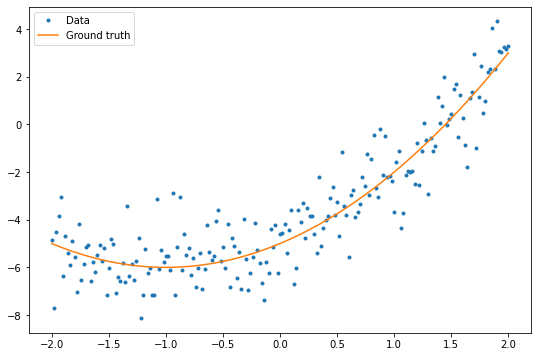

In [35]:
plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x), label='Ground truth')
plt.legend()

Create a quadratic model with randomly initialized weights and a bias

In [36]:
class Model(tf.Module):
    def __init__(self):
        # Randomly generate weight and bias terms
        rand_init = tf.random.uniform(
            shape=[3],
            minval=0.,
            maxval=5.,
            seed=22
        )

        # Initialize model parameters
        self.w_q = tf.Variable(rand_init[0])
        self.w_l = tf.Variable(rand_init[1])
        self.b = tf.Variable(rand_init[2])

    @tf.function
    def __call__(self, x):
        # Quadratic Model: quadratic_weight * x^2 + linear_weight * x + bias
        return self.w_q * (x**2) + self.w_l * x + self.b


First, observe your model's performance before training:

In [37]:
quad_model = Model()

In [38]:
def plot_preds(x, y, f, model, title):
    plt.figure()
    plt.plot(x, y, '.', label='Data')
    plt.plot(x, f(x), label='Ground truth')
    plt.plot(x, model(x), label='Predictions')
    plt.title(title)
    plt.legend()

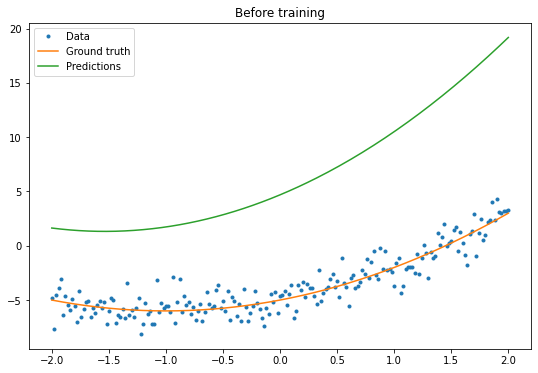

In [39]:
plot_preds(x, y, f, quad_model, 'Before training')

Define a loss for your model, the **Mean Squared Error (MSE)** is a good choice for the loss function.

In [40]:
def mse_loss(y_pred, y):
    return tf.reduce_mean(tf.square(y_pred - y))

Write a basic training loop for the model. The loop will make use of MSE loss function and its gradients with respect to the input in order to iteratively update the model's parameters. Using mini-batches for training provides both memory efficiency and faster convergence. The `tf.data.Dataset` API has useful functions for batching and shuffling.

In [41]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices((x, y))
dataset = dataset.shuffle(buffer_size=x.shape[0]).batch(batch_size)

Mean squared error for step 0: 53.182
Mean squared error for step 10: 9.837
Mean squared error for step 20: 4.202
Mean squared error for step 30: 2.231
Mean squared error for step 40: 1.558
Mean squared error for step 50: 1.316
Mean squared error for step 60: 1.238
Mean squared error for step 70: 1.207
Mean squared error for step 80: 1.198
Mean squared error for step 90: 1.192




Text(0.5, 1.0, 'MSE loss vs training iterations')

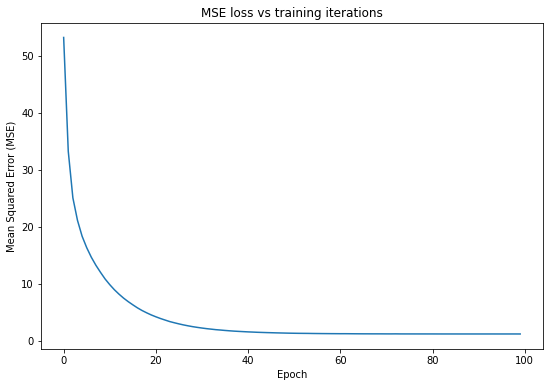

In [42]:
# Set training parameters
epochs = 100
learning_rate = 0.01
losses = []

# Format training loop
for epoch in range(epochs):
    for x_batch, y_batch in dataset:
        with tf.GradientTape() as tape:
            batch_loss = mse_loss(quad_model(x_batch), y_batch)
        
        # Update parameters with respect to the gradient calculations
        grads = tape.gradient(batch_loss, quad_model.variables)
        for g, v in zip(grads, quad_model.variables):
            v.assign_sub(learning_rate * g)
    # Keep track of model loss per epoch
    loss = mse_loss(quad_model(x), y)
    losses.append(loss)

    if epoch % 10 == 0:
        print(f'Mean squared error for step {epoch}: {loss.numpy():0.3f}')

# Plot model results
print('\n')
plt.plot(range(epochs), losses)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error (MSE)")
plt.title('MSE loss vs training iterations')

Now, observe your model's performance after training:

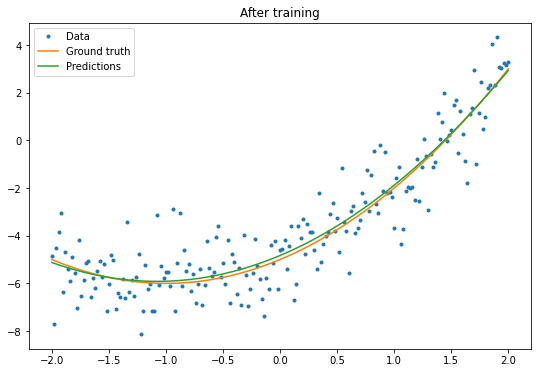

In [43]:
plot_preds(x, y, f, quad_model, 'After training')

Implementations of common training utilities are available in the `tf.keras` module. So, consider using those before writing your own. To start with, the `Model.compile` and `Model.fit` methods implement a training loop for you:

In [44]:
new_model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.stack([x, x**2], axis=1)),
    tf.keras.layers.Dense(units=1, kernel_initializer=tf.random.normal)
])

In [45]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01)
)

history = new_model.fit(
    x, y,
    epochs=100,
    batch_size=32,
    verbose=0
)

new_model.save('./my_new_model')

Observe your Keras model's performance after training:

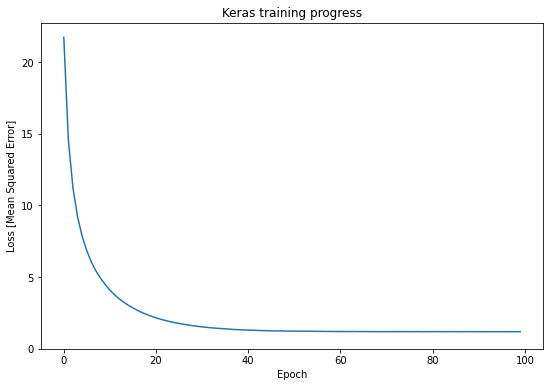

In [46]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');

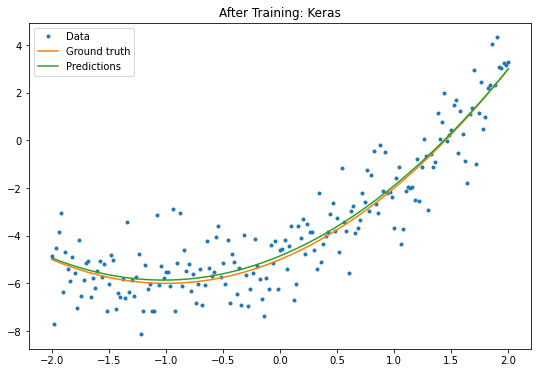

In [47]:
plot_preds(x, y, f, new_model, 'After Training: Keras')